<a href="https://colab.research.google.com/github/222010303005/Final-Year-Mini-Project_7016/blob/main/LSTM_FINE_TUNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!pip install mlxtend

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords
import re

import re

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Dense
from keras.backend import eval
from keras.optimizers import Adam
from keras.layers import LSTM

from keras.layers import Dropout

from sklearn import metrics

In [5]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/MyDrive/new_flipkart_labels.xlsx')
df.head()

Mounted at /content/drive


,Unnamed: 0,review,review_lemm,scores,compound_score,label
0,0,more flexible bass is very high sound clarity...,flexible bass high sound clarity good batter...,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'com...",0.8934,pos
1,1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'comp...",0.9118,pos
2,2,very much satisfied with the device at this pr...,satisfied device price point awesome brand des...,"{'neg': 0.0, 'neu': 0.535, 'pos': 0.465, 'comp...",0.9590,pos
3,3,nice headphone bass was very good and sound is...,nice headphone bass good sound clear purchase ...,"{'neg': 0.065, 'neu': 0.529, 'pos': 0.406, 'co...",0.8910,pos
4,4,sound quality super battery backup super quali...,sound quality super battery backup super quali...,"{'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'comp...",0.9584,pos


In [18]:
from sklearn.model_selection import train_test_split
X = df['review_lemm']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from xgboost import XGBClassifier

In [13]:
# imporing pipeline and model libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Naïve Bayes Pipeline:
text_clf_Mnb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf', MultinomialNB()),])

# Linear SVC Pipeline:
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1, 1))),
                     ('clf', LinearSVC()),])

In [15]:
text_clf_xgb = Pipeline([('tfidf', TfidfVectorizer(ngram_range=(1,1))),
                     ('clf', XGBClassifier()),])

In [16]:
text_clf_xgb

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [20]:
text_clf_xgb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [21]:
predictions = text_clf_xgb.predict(X_test)

In [22]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[153  17  56]
 [  4 198  13]
 [ 16   7 790]]


In [23]:
print(metrics.accuracy_score(y_test,predictions))

0.9098883572567783


([0.9960629921259843,
  0.9960707269155207,
  0.9973787680209698,
  0.9960707269155207,
  0.997643362136685,
  0.9954158480681073,
  0.9949494949494949,
  0.9931237721021611,
  0.9921431689218682,
  0.99057344854674],
 [0.8325358851674641,
  0.84688995215311,
  0.868421052631579,
  0.8763955342902712,
  0.879585326953748,
  0.8907496012759171,
  0.8995215311004785,
  0.8995215311004785,
  0.9035087719298246,
  0.9098883572567783])

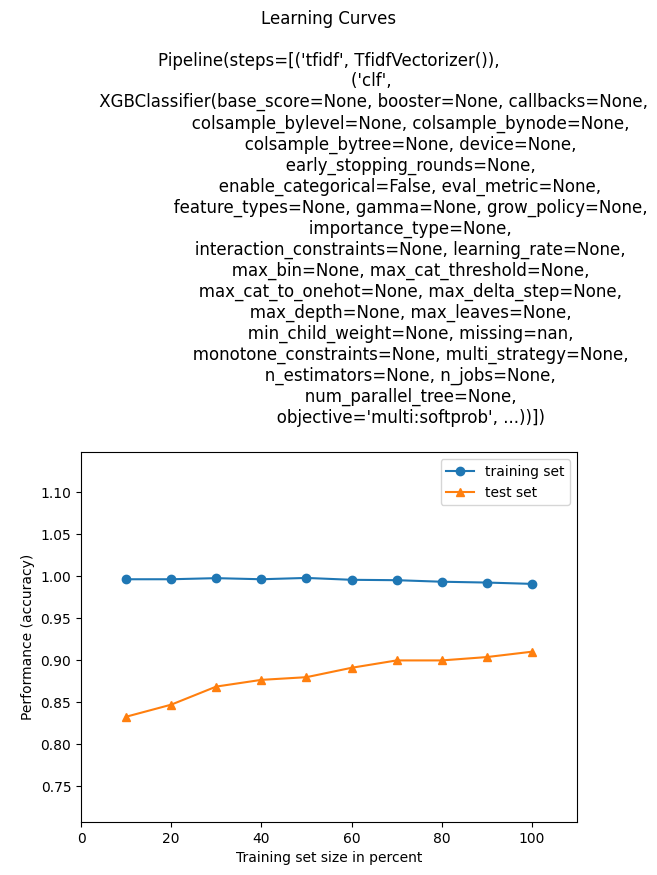

In [28]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train,y_train, X_test,y_test,text_clf_xgb, scoring='accuracy')

In [36]:
reviews=df['review_lemm']
df['review_lemm'] = df['review_lemm'].apply(lambda x: str(x).lower())

In [37]:
print(df.shape)

(3800, 6)




## model 1-LSTM  

max_features=20000  

maxlen=100

embedding_size=128  

epochs==4



In [72]:
max_features = 20000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 4

In [73]:
tokenizer = Tokenizer(nb_words = max_features, split=' ')
tokenizer.fit_on_texts(df['review_lemm'].values)
X = tokenizer.texts_to_sequences(df['review_lemm'].values)
X = pad_sequences(X, maxlen = maxlen)

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [74]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3040, 100) (3040, 3)
(760, 100) (760, 3)


In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [76]:
print('Build model...')

model = Sequential()
embedding_layer = Embedding(max_features, embedding_size, input_length=maxlen)
model.add(embedding_layer)
model.compile('adam','mse')
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Build model...
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 128)          2560000   
                                                                 
 dropout_6 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_5 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 70)                37800     
                                                                 
 dense_5 (Dense)             (None, 3)                 213       
                                      

In [77]:
print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Train...
Epoch 1/4
102/102 [==============================] - 7s 51ms/step - loss: 0.6703 - accuracy: 0.7164 - val_loss: 0.4654 - val_accuracy: 0.8750
Epoch 2/4
102/102 [==============================] - 4s 39ms/step - loss: 0.2738 - accuracy: 0.9086 - val_loss: 0.2439 - val_accuracy: 0.9145
Epoch 3/4
102/102 [==============================] - 4s 41ms/step - loss: 0.1382 - accuracy: 0.9579 - val_loss: 0.2400 - val_accuracy: 0.9263
Epoch 4/4
102/102 [==============================] - 5s 45ms/step - loss: 0.0789 - accuracy: 0.9753 - val_loss: 0.2506 - val_accuracy: 0.9303


In [78]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 11ms/step - loss: 0.2506 - accuracy: 0.9303
Test set
  Loss: 0.25062
  Accuracy: 0.930


In [79]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 10ms/step


array(['Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Pos', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neg', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [80]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02       134
           1       0.10      0.10      0.10       127
           2       0.94      0.99      0.96       499

   micro avg       0.67      0.67      0.67       760
   macro avg       0.36      0.37      0.36       760
weighted avg       0.64      0.67      0.65       760
 samples avg       0.67      0.67      0.67       760



In [81]:
acc_1=metrics.accuracy_score(Y_test,new_pred)
print(acc_1)

0.6684210526315789


## MODEL-2 LSTM
max_features = 20000

maxlen = 100

embedding_size = 128

 EPochs=10

In [82]:
max_features = 20000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 10

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 128)          2560000   
                                                                 
 dropout_7 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_6 (LSTM)               (None, 70)                37800     
                                                                 
 dense_6 (Dense)             (None, 3)                 213       
                                                     

In [83]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 17ms/step - loss: 0.3866 - accuracy: 0.9250
Test set
  Loss: 0.38662
  Accuracy: 0.925


In [84]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 10ms/step


array(['Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neu', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Pos', 'Neu', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neu', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [85]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.04      0.03      0.03       134
           1       0.09      0.09      0.09       127
           2       0.95      0.97      0.96       499

   micro avg       0.66      0.66      0.66       760
   macro avg       0.36      0.36      0.36       760
weighted avg       0.64      0.66      0.65       760
 samples avg       0.66      0.66      0.66       760



In [86]:
acc2=metrics.accuracy_score(Y_test,new_pred)
acc2

0.656578947368421

## MODEL-3 LSTM
max_features = 20000

maxlen = 100

embedding_size = 128

EPochs=15

In [87]:
max_features = 20000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 100, 128)          2560000   
                                                                 
 dropout_8 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_7 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_7 (LSTM)               (None, 70)                37800     
                                                                 
 dense_7 (Dense)             (None, 3)                 213       
                                                     

In [88]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 11ms/step - loss: 0.3682 - accuracy: 0.9408
Test set
  Loss: 0.36818
  Accuracy: 0.941


In [89]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 8ms/step


array(['Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Pos', 'Neu', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neu', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [90]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.04      0.04      0.04       134
           1       0.07      0.06      0.06       127
           2       0.95      0.99      0.97       499

   micro avg       0.67      0.67      0.67       760
   macro avg       0.35      0.36      0.36       760
weighted avg       0.64      0.67      0.65       760
 samples avg       0.67      0.67      0.67       760



In [91]:
acc_3=metrics.accuracy_score(Y_test,new_pred)
acc_3

0.6657894736842105

##  ModeL-4 LSTM
max_features = 30000

maxlen = 100

embedding_size = 128

EPochs=10

In [92]:
max_features = 30000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 100, 128)          3840000   
                                                                 
 dropout_9 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_8 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 70)                37800     
                                                                 
 dense_8 (Dense)             (None, 3)                 213       
                                                     

In [93]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 7ms/step - loss: 0.4317 - accuracy: 0.9276
Test set
  Loss: 0.43169
  Accuracy: 0.928


In [94]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 10ms/step


array(['Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neu', 'Pos', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Pos', 'Neu', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neu', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [95]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.03      0.02      0.02       134
           1       0.10      0.10      0.10       127
           2       0.94      0.98      0.96       499

   micro avg       0.66      0.66      0.66       760
   macro avg       0.36      0.37      0.36       760
weighted avg       0.64      0.66      0.65       760
 samples avg       0.66      0.66      0.66       760



In [96]:
acc_4=metrics.accuracy_score(Y_test,new_pred)
acc_4

0.6644736842105263

##  ModeL-5 LSTM
max_features = 40000

maxlen = 100

embedding_size = 128

EPochs=15

In [97]:
max_features = 40000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 100, 128)          5120000   
                                                                 
 dropout_10 (Dropout)        (None, 100, 128)          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_9 (LSTM)               (None, 70)                37800     
                                                                 
 dense_9 (Dense)             (None, 3)                 213       
                                                     

In [98]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 10ms/step - loss: 0.4934 - accuracy: 0.9158
Test set
  Loss: 0.49343
  Accuracy: 0.916


In [99]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 9ms/step


array(['Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neu', 'Neu', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neu', 'Neu', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neu', 'Neg', 'Neg', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Pos', 'Neg', 'Pos',
       'Pos', 'Neg',

In [100]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.03      0.02      0.03       134
           1       0.17      0.17      0.17       127
           2       0.94      0.99      0.96       499

   micro avg       0.68      0.68      0.68       760
   macro avg       0.38      0.39      0.39       760
weighted avg       0.65      0.68      0.66       760
 samples avg       0.68      0.68      0.68       760



In [101]:
acc_5=metrics.accuracy_score(Y_test,new_pred)
acc_5

0.6815789473684211

##  ModeL-6 LSTM
max_features = 45000

maxlen = 100

embedding_size = 128

EPochs=15

test_size=30%

In [103]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2660, 100) (2660, 3)
(1140, 100) (1140, 3)


In [105]:
max_features = 30000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70      # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 100, 128)          3840000   
                                                                 
 dropout_12 (Dropout)        (None, 100, 128)          0         
                                                                 
 conv1d_11 (Conv1D)          (None, 96, 64)            41024     
                                                                 
 max_pooling1d_11 (MaxPooli  (None, 24, 64)            0         
 ng1D)                                                           
                                                                 
 lstm_11 (LSTM)              (None, 70)                37800     
                                                                 
 dense_11 (Dense)            (None, 3)                 213       
                                                     

In [106]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

36/36 [==============================] - 1s 7ms/step - loss: 0.4291 - accuracy: 0.9237
Test set
  Loss: 0.42908
  Accuracy: 0.924


In [107]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions


36/36 [==============================] - 1s 9ms/step


array(['Neg', 'Neg', 'Neu', ..., 'Neg', 'Pos', 'Neg'], dtype='<U3')

In [108]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))


              precision    recall  f1-score   support

           0       0.02      0.02      0.02       198
           1       0.11      0.11      0.11       194
           2       0.95      0.97      0.96       748

   micro avg       0.66      0.66      0.66      1140
   macro avg       0.36      0.37      0.36      1140
weighted avg       0.64      0.66      0.65      1140
 samples avg       0.66      0.66      0.66      1140



In [109]:
acc_6=metrics.accuracy_score(Y_test,new_pred)
acc_6

0.6605263157894737

##  ModeL-7 LSTM
max_features = 30000

maxlen = 100

embedding_size = 128

EPochs=15

lstm_output_size = 100

In [110]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2660, 100) (2660, 3)
(1140, 100) (1140, 3)


In [111]:
max_features = 30000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 100      # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 100, 128)          3840000   
                                                                 
 dropout_13 (Dropout)        (None, 100, 128)          0         
                                                                 
 conv1d_12 (Conv1D)          (None, 96, 64)            41024     
                                                                 
 max_pooling1d_12 (MaxPooli  (None, 24, 64)            0         
 ng1D)                                                           
                                                                 
 lstm_12 (LSTM)              (None, 100)               66000     
                                                                 
 dense_12 (Dense)            (None, 3)                 303       
                                                     

In [112]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

36/36 [==============================] - 1s 8ms/step


array(['Neg', 'Neg', 'Neu', ..., 'Neg', 'Pos', 'Neg'], dtype='<U3')

In [113]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))

              precision    recall  f1-score   support

           0       0.08      0.08      0.08       198
           1       0.08      0.08      0.08       194
           2       0.95      0.96      0.96       748

   micro avg       0.66      0.66      0.66      1140
   macro avg       0.37      0.37      0.37      1140
weighted avg       0.65      0.66      0.66      1140
 samples avg       0.66      0.66      0.66      1140



In [114]:
acc_7=metrics.accuracy_score(Y_test,new_pred)
acc_7

0.6578947368421053

##  ModeL-8 LSTM
max_features = 30000

maxlen = 100

embedding_size = 128

EPochs=15

kernel size = 7

In [115]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3040, 100) (3040, 3)
(760, 100) (760, 3)


In [116]:
max_features = 30000

maxlen = 100

embedding_size = 128


# Convolution
kernel_size = 7
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70    # what is its impact

# Training
batch_size = 30
epochs = 15

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

print('Train...')
model_lstm=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,shuffle=True, validation_data=(X_test, Y_test))


Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 100, 128)          3840000   
                                                                 
 dropout_14 (Dropout)        (None, 100, 128)          0         
                                                                 
 conv1d_13 (Conv1D)          (None, 94, 64)            57408     
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 23, 64)            0         
 ng1D)                                                           
                                                                 
 lstm_13 (LSTM)              (None, 70)                37800     
                                                                 
 dense_13 (Dense)            (None, 3)                 213       
                                                     

In [117]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.5f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

24/24 [==============================] - 0s 9ms/step - loss: 0.8659 - accuracy: 0.7711
Test set
  Loss: 0.86586
  Accuracy: 0.771


In [118]:
predictions=[]
pred = model.predict(X_test)
for x in pred:
    labels = ['Neu','Pos','Neg']
    predictions.append(labels[np.argmax(x)])
predictions=np.array(predictions)
predictions

24/24 [==============================] - 1s 12ms/step


array(['Neg', 'Neu', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu',
       'Neu', 'Neu', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neg',
       'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu',
       'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg',
       'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Neg', 'Neg', 'Neg', 'Pos',
       'Neg', 'Neu', 'Pos', 'Pos', 'Neg', 'Pos', 'Neg', 'Neu', 'Neg',
       'Neu', 'Neu', 'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neg',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neu', 'Neg', 'Neu', 'Pos', 'Neu', 'Neu',
       'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Pos', 'Neg', 'Neg', 'Neu',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Neu', 'Pos', 'Neu', 'Neg',
       'Neu', 'Neg', 'Neg', 'Neg', 'Neg', 'Pos', 'Neu', 'Neu', 'Neu',
       'Neu', 'Neg',

In [119]:
new_pred=[]
for x in predictions:
    if x=='Pos':
        new_pred.append([1,0,0])
    if x=='Neu':
        new_pred.append([0,1,0])
    if x=='Neg':
        new_pred.append([0,0,1])
new_pred=np.array(new_pred)
print(metrics.classification_report(Y_test,new_pred))


              precision    recall  f1-score   support

           0       0.15      0.08      0.11       134
           1       0.30      0.50      0.37       127
           2       0.92      0.87      0.90       499

   micro avg       0.67      0.67      0.67       760
   macro avg       0.46      0.48      0.46       760
weighted avg       0.68      0.67      0.67       760
 samples avg       0.67      0.67      0.67       760



In [120]:
acc_8=metrics.accuracy_score(Y_test,new_pred)
acc_8

0.6710526315789473